# **Práctica 10: Pronóstico (Árboles de decisión)**

Nombre:

No. Cuenta:

Email:

### **Contexto**

Yahoo Finance ofrece una amplia variedad de datos de mercado sobre acciones, bonos, divisas y criptomonedas. También proporciona informes de noticias con varios puntos de vista sobre diferentes mercados de todo el mundo, todos accesibles a través de la biblioteca yfinance.

**Objetivo:** Hacer un pronóstico del precio de las acciones a través de un algoritmo de aprendizaje automático.

**Fuente de datos**

De Yahoo Finanzas se utiliza el Ticker -Etiqueta de cotización- de la acción bursatil.

### **Importar las bibliotecas y los datos**

In [1]:
!pip install yfinance
#!pip install googlefinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline             
# Para generar y almacenar los gráficos dentro del cuaderno
import yfinance as yf

In [3]:
# Para Amazon
DataAmazon = yf.Ticker('AMZN')

In [42]:
AmazonHist = DataAmazon.history(start = '2019-1-1', end = '2023-05-11', interval='1d')
AmazonHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00-05:00,73.260002,77.667999,73.046501,76.956497,159662000,0.0,0.0
2019-01-03 00:00:00-05:00,76.000504,76.900002,74.855499,75.014000,139512000,0.0,0.0
2019-01-04 00:00:00-05:00,76.500000,79.699997,75.915497,78.769501,183652000,0.0,0.0
2019-01-07 00:00:00-05:00,80.115501,81.727997,79.459503,81.475502,159864000,0.0,0.0
2019-01-08 00:00:00-05:00,83.234497,83.830498,80.830498,82.829002,177628000,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-04 00:00:00-04:00,104.040001,105.389999,103.309998,104.000000,45345500,0.0,0.0
2023-05-05 00:00:00-04:00,104.269997,105.760002,103.550003,105.660004,56912900,0.0,0.0
2023-05-08 00:00:00-04:00,105.040001,106.099998,104.699997,105.830002,49430900,0.0,0.0


Descripción:

* En el comercio de acciones, 'alto' y 'bajo' se refieren a los precios máximos y mínimos en un período determinado.
* 'Apertura' y 'cierre' son los precios en los que una acción comenzó y terminó cotizando en el mismo período. 
* El 'volumen' es la cantidad total de la actividad comercial. 
* Los valores ajustados tienen en cuenta las acciones corporativas, como los 'dividendos', la 'división de acciones' y la emisión de nuevas acciones.

### **Descripción de la estructura de los datos**

Se puede usar **info()** para obtener el tipo de datos y la suma de valores nulos. Se observa que los datos son numéricos (flotante y entero).

In [43]:
AmazonHist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1097 entries, 2019-01-02 00:00:00-05:00 to 2023-05-10 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1097 non-null   float64
 1   High          1097 non-null   float64
 2   Low           1097 non-null   float64
 3   Close         1097 non-null   float64
 4   Volume        1097 non-null   int64  
 5   Dividends     1097 non-null   float64
 6   Stock Splits  1097 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 68.6 KB


In [44]:
AmazonHist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1097.000000,1097.000000,1097.000000,1097.000000,1.097000e+03,1097.0,1097.000000
mean,126.785349,128.350707,125.100823,126.741448,7.891095e+07,0.0,0.018232
std,33.216312,33.530176,32.795502,33.108249,3.407157e+07,0.0,0.603847
min,73.260002,76.900002,73.046501,75.014000,1.762600e+07,0.0,0.000000
25%,94.040001,95.125000,92.973999,94.139999,5.624200e+07,0.0,0.000000
50%,120.249496,121.994499,118.449997,120.511002,6.933400e+07,0.0,0.000000
75%,160.149994,161.750000,158.184006,160.000000,9.265600e+07,0.0,0.000000
max,187.199997,188.654007,184.839493,186.570496,3.113460e+08,0.0,20.000000


* Se incluye un recuento, media, desviación, valor mínimo, valor máximo, percentil inferior (25%), 50% y percentil superior (75%).
* Por defecto, el percentil 50 es lo mismo que la mediana.
* Se observa que para cada variable, el recuento también ayuda a identificar variables con valores nulos o vacios. Estos son: **Dividends** y **Stock Splits**.

### **Gráfica de los precios de las acciones**

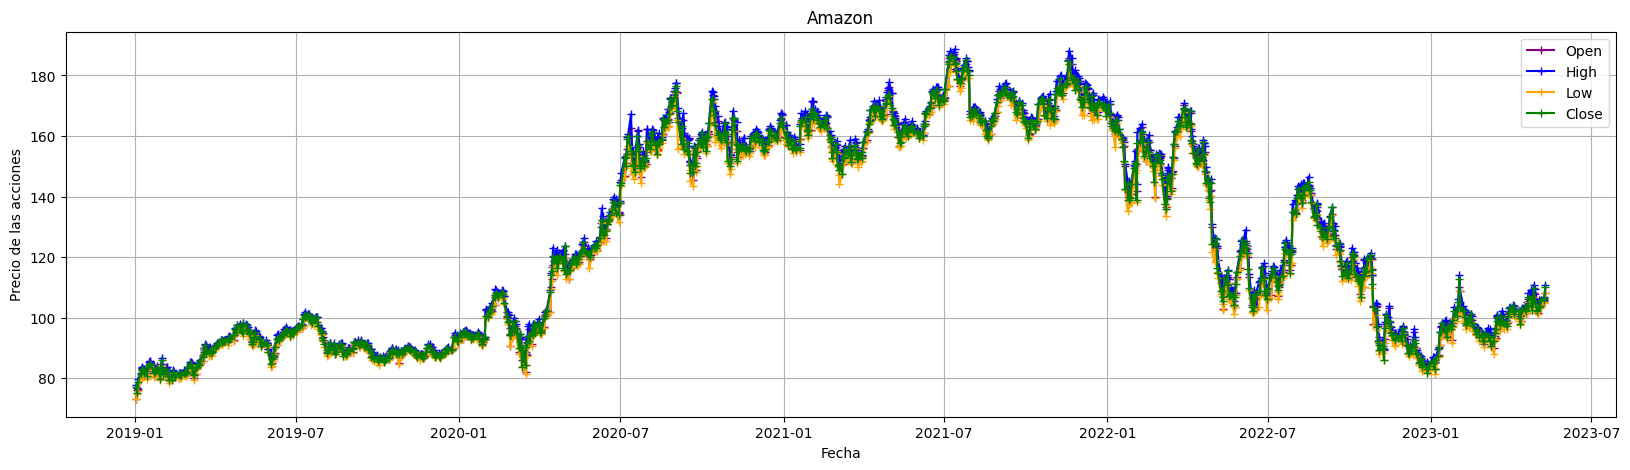

In [45]:
plt.figure(figsize=(20, 5))
plt.plot(AmazonHist['Open'], color='purple', marker='+', label='Open')
plt.plot(AmazonHist['High'], color='blue', marker='+', label='High')
plt.plot(AmazonHist['Low'], color='orange', marker='+', label='Low')
plt.plot(AmazonHist['Close'], color='green', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Amazon')
plt.grid(True)
plt.legend()
plt.show()

In [46]:
MDatos = AmazonHist.drop(columns = ['Volume', 'Dividends', 'Stock Splits'])
MDatos

,Open,High,Low,Close
Date,,,,
2019-01-02 00:00:00-05:00,73.260002,77.667999,73.046501,76.956497
2019-01-03 00:00:00-05:00,76.000504,76.900002,74.855499,75.014000
2019-01-04 00:00:00-05:00,76.500000,79.699997,75.915497,78.769501
2019-01-07 00:00:00-05:00,80.115501,81.727997,79.459503,81.475502
2019-01-08 00:00:00-05:00,83.234497,83.830498,80.830498,82.829002
...,...,...,...,...
2023-05-04 00:00:00-04:00,104.040001,105.389999,103.309998,104.000000
2023-05-05 00:00:00-04:00,104.269997,105.760002,103.550003,105.660004
2023-05-08 00:00:00-04:00,105.040001,106.099998,104.699997,105.830002


In [47]:
# En caso de tener valores nulos
MDatos = MDatos.dropna()
MDatos

,Open,High,Low,Close
Date,,,,
2019-01-02 00:00:00-05:00,73.260002,77.667999,73.046501,76.956497
2019-01-03 00:00:00-05:00,76.000504,76.900002,74.855499,75.014000
2019-01-04 00:00:00-05:00,76.500000,79.699997,75.915497,78.769501
2019-01-07 00:00:00-05:00,80.115501,81.727997,79.459503,81.475502
2019-01-08 00:00:00-05:00,83.234497,83.830498,80.830498,82.829002
...,...,...,...,...
2023-05-04 00:00:00-04:00,104.040001,105.389999,103.309998,104.000000
2023-05-05 00:00:00-04:00,104.269997,105.760002,103.550003,105.660004
2023-05-08 00:00:00-04:00,105.040001,106.099998,104.699997,105.830002


### Aplicación del algoritmo

In [48]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Se seleccionan las variables predictoras (X) y la variable a pronosticar (Y)

In [49]:
X = np.array(MDatos[['Open',
                     'High',
                     'Low']])
pd.DataFrame(X)

,0,1,2
0,73.260002,77.667999,73.046501
1,76.000504,76.900002,74.855499
2,76.500000,79.699997,75.915497
3,80.115501,81.727997,79.459503
4,83.234497,83.830498,80.830498
...,...,...,...
1092,104.040001,105.389999,103.309998
1093,104.269997,105.760002,103.550003
1094,105.040001,106.099998,104.699997
1095,105.480003,106.790001,105.160004


In [50]:
Y = np.array(MDatos[['Close']])
pd.DataFrame(Y)

,0
0,76.956497
1,75.014000
2,78.769501
3,81.475502
4,82.829002
...,...
1092,104.000000
1093,105.660004
1094,105.830002
1095,106.620003


Se hace la división de los datos

In [51]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, 
                                                                    test_size = 0.2, 
                                                                    random_state = 0, 
                                                                    shuffle = True)

In [52]:
pd.DataFrame(X_test)

,0,1,2
0,176.150497,177.179993,174.750504
1,80.049004,80.464500,79.300003
2,101.160004,103.349998,101.139999
3,157.149994,159.523499,156.300003
4,87.146004,87.272499,86.492996
...,...,...,...
215,160.585495,161.661499,156.304504
216,142.690002,143.380005,140.779999
217,139.837494,151.748993,139.500000
218,165.570999,170.520996,165.199997


Se entrena el modelo

In [124]:
#PronosticoAD = DecisionTreeRegressor(random_state=0)
#PronosticoAD.fit(X_train, Y_train)

PronosticoAD = DecisionTreeRegressor(max_depth=9, min_samples_split=8, min_samples_leaf=4, random_state=0)
PronosticoAD.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=4, min_samples_split=8,
                      random_state=0)

In [125]:
#Se genera el pronóstico
Y_Pronostico = PronosticoAD.predict(X_test)
pd.DataFrame(Y_Pronostico)

,0
0,175.391499
1,79.616249
2,102.378357
3,157.198715
4,87.021000
...,...
215,158.312598
216,143.620502
217,142.578900
218,170.058835


In [126]:
Valores = pd.DataFrame(Y_test, Y_Pronostico)
Valores

,0
175.391499,176.158005
79.616249,79.550003
102.378357,103.129997
157.198715,157.848495
87.021000,86.596001
...,...
158.312598,161.485992
143.620502,142.100006
142.578900,151.358002
170.058835,170.451004


In [127]:
r2_score(Y_test, Y_Pronostico)

0.9978761030075568

In [128]:
print('Criterio: \n', PronosticoAD.criterion)
print('Importancia variables: \n', PronosticoAD.feature_importances_)
print("MAE: %.4f" % mean_absolute_error(Y_test, Y_Pronostico))
print("MSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico))
print("RMSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score: %.4f' % r2_score(Y_test, Y_Pronostico))


Criterio: 
 squared_error
Importancia variables: 
 [2.51905046e-04 5.95167516e-02 9.40231343e-01]
MAE: 1.0746
MSE: 2.2816
RMSE: 1.5105
Score: 0.9979


#### **Conformación del modelo de pronóstico**

* Se tiene un Score de 0.9976, que indica que el pronóstico del precio de cierre de la acción se logrará con un 99.7% de efectividad.
* Además, los pronósticos del modelo final se alejan en promedio 2.57 y 1.6 unidades del valor real, esto es, MSE y RMSE, respectivamente.

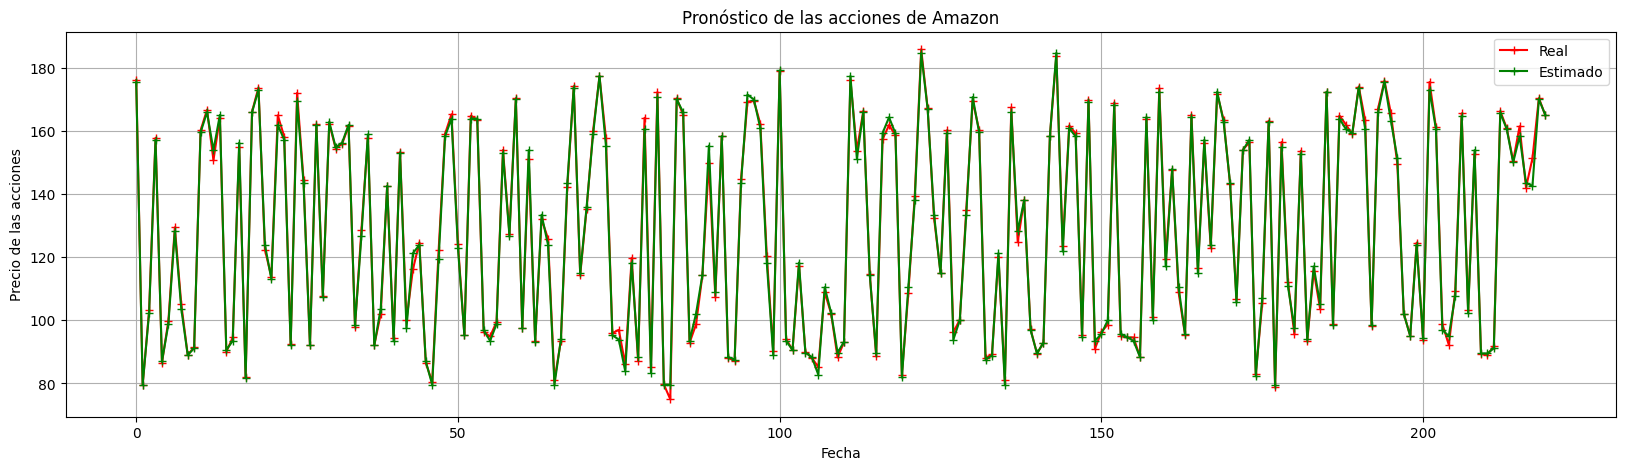

In [129]:
plt.figure(figsize=(20, 5))
plt.plot(Y_test, color='red', marker='+', label='Real')
plt.plot(Y_Pronostico, color='green', marker='+', label='Estimado')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Pronóstico de las acciones de Amazon')
plt.grid(True)
plt.legend()
plt.show()

In [130]:
Importancia = pd.DataFrame({'Variable': list(MDatos[['Open', 'High', 'Low']]),
                            'Importancia': PronosticoAD.feature_importances_}).sort_values('Importancia', ascending=False)
Importancia

,Variable,Importancia
2,Low,0.940231
1,High,0.059517
0,Open,0.000252


#### **Conformación del árbol**

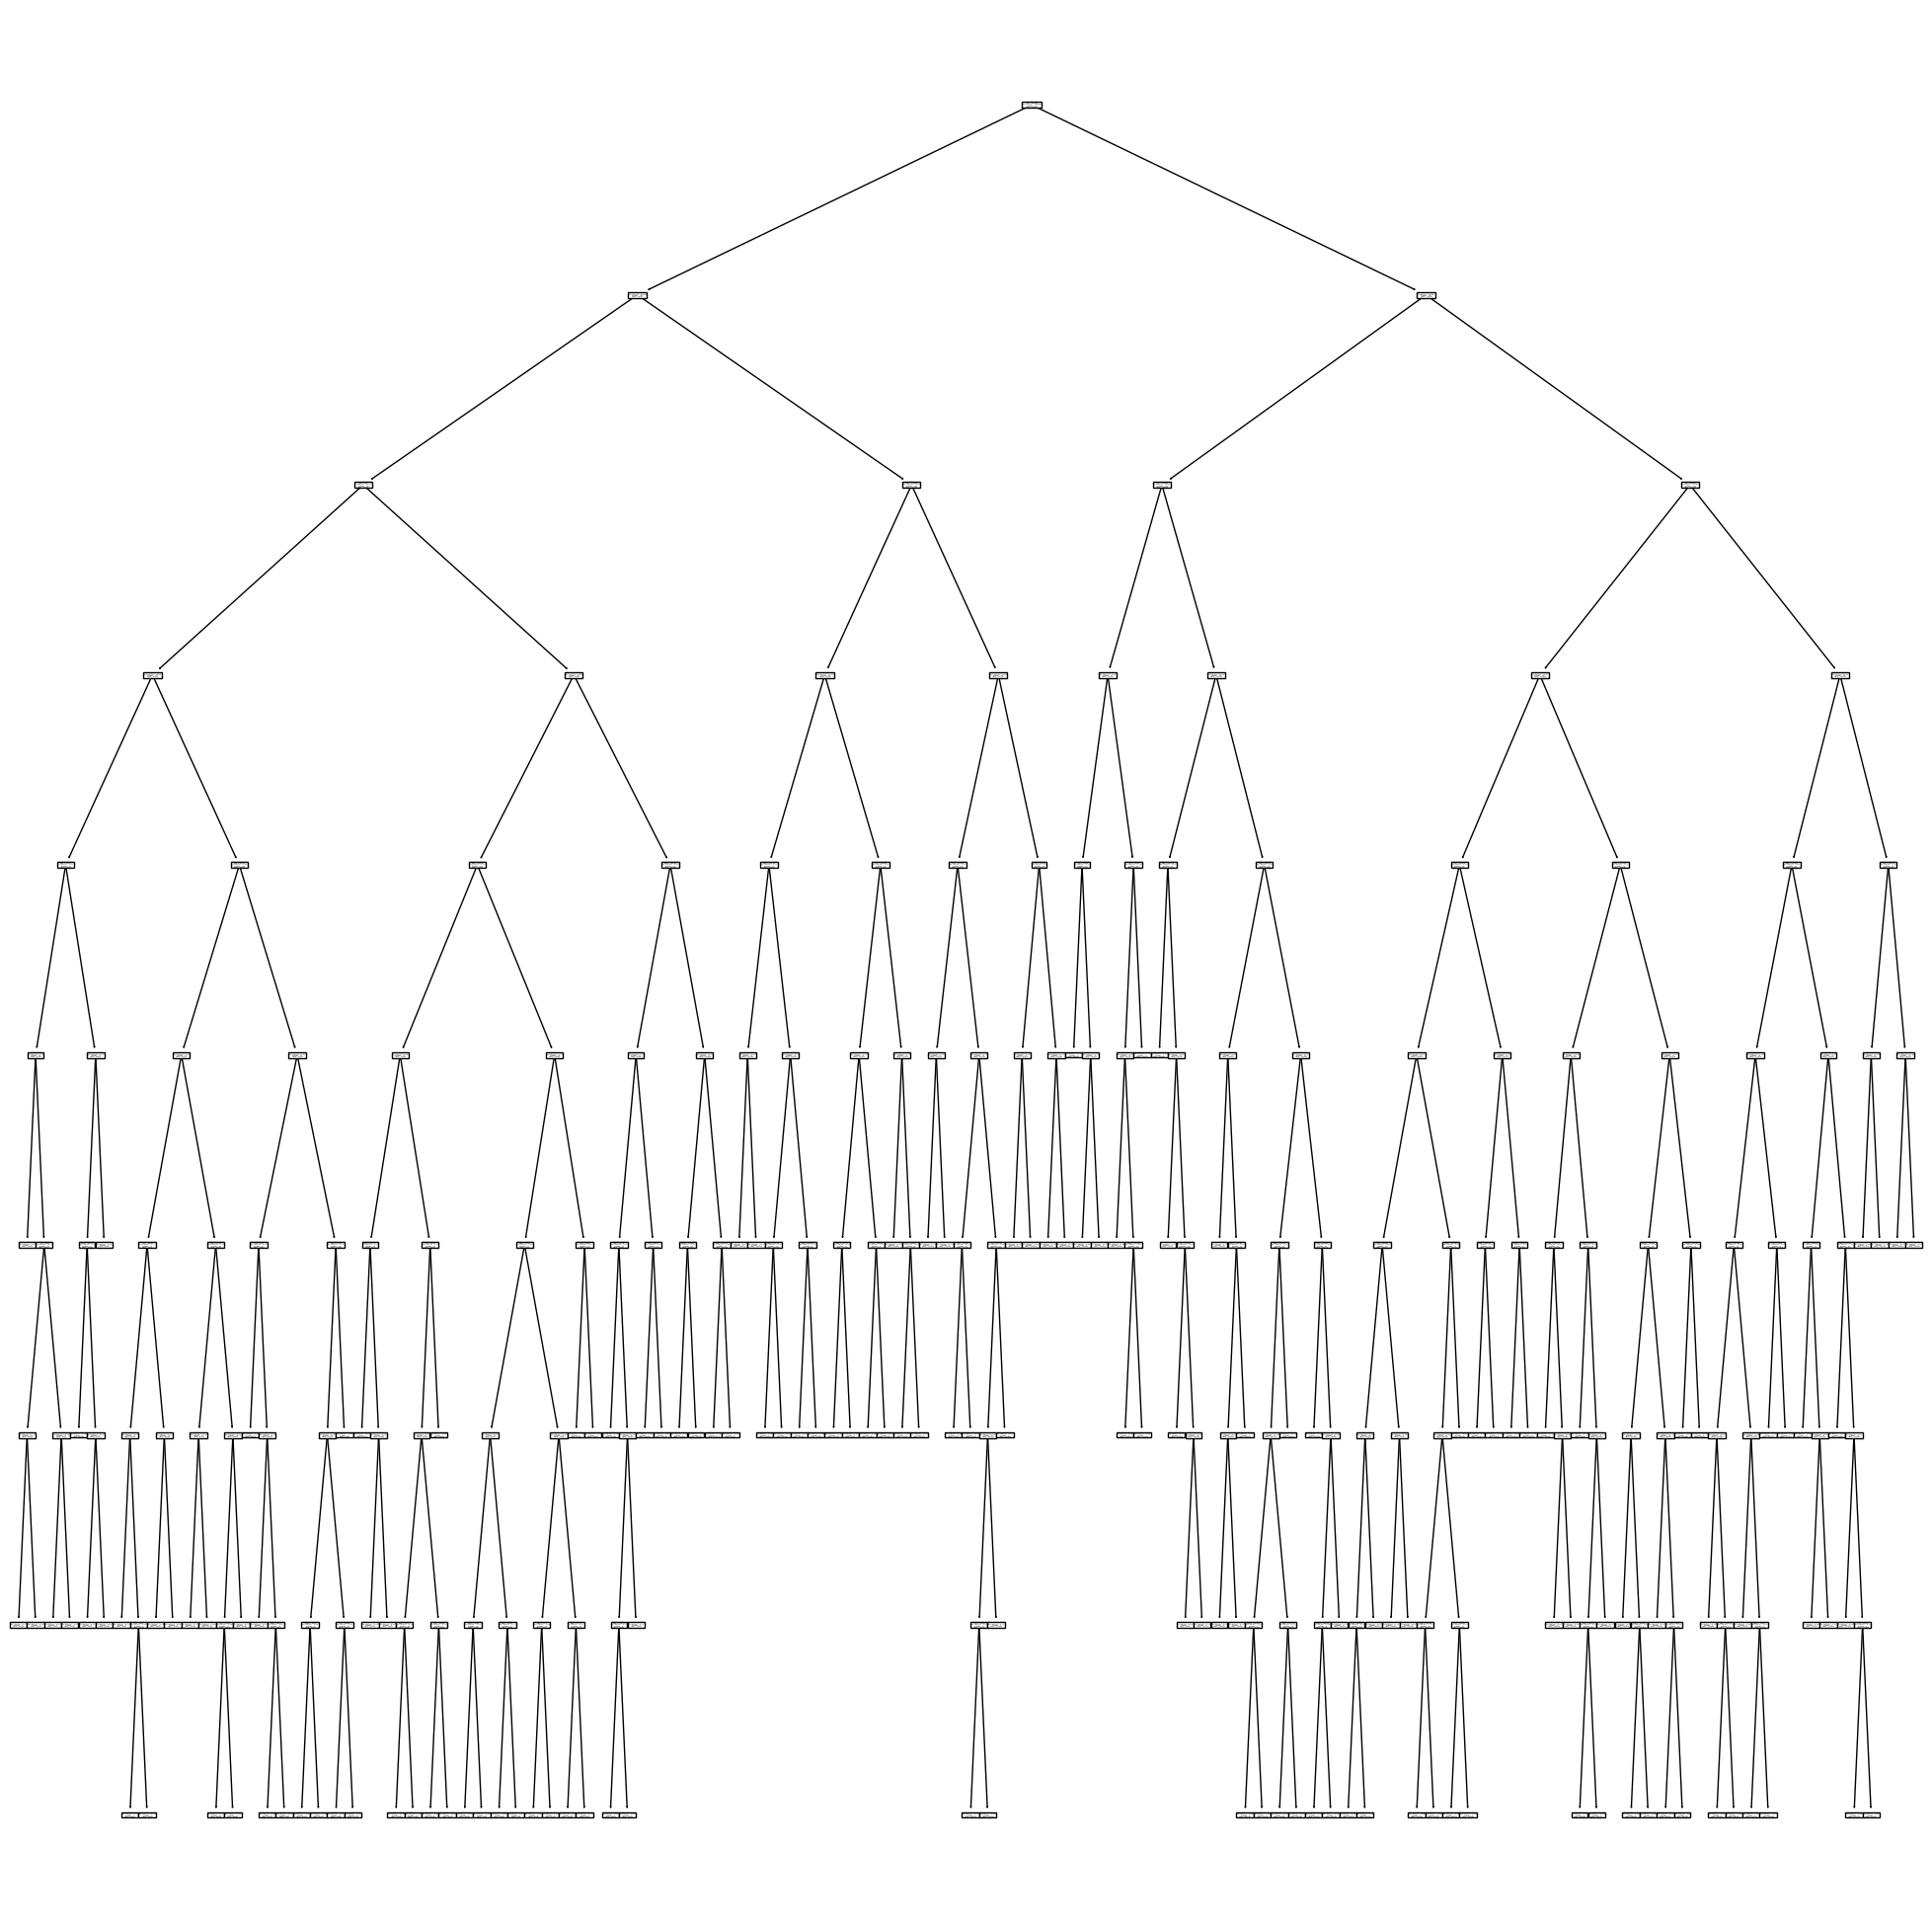

In [131]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,25))  
plot_tree(PronosticoAD, feature_names = ['Open', 'High', 'Low'])
plt.show()

In [132]:
from sklearn.tree import export_text
Reporte = export_text(PronosticoAD, feature_names = ['Open', 'High', 'Low'])
print(Reporte)

|--- Low <= 126.96
|   |--- High <= 104.90
|   |   |--- Low <= 90.50
|   |   |   |--- Low <= 84.00
|   |   |   |   |--- High <= 83.68
|   |   |   |   |   |--- High <= 81.71
|   |   |   |   |   |   |--- value: [79.62]
|   |   |   |   |   |--- High >  81.71
|   |   |   |   |   |   |--- Low <= 81.07
|   |   |   |   |   |   |   |--- Low <= 80.59
|   |   |   |   |   |   |   |   |--- value: [81.29]
|   |   |   |   |   |   |   |--- Low >  80.59
|   |   |   |   |   |   |   |   |--- value: [81.72]
|   |   |   |   |   |   |--- Low >  81.07
|   |   |   |   |   |   |   |--- High <= 83.09
|   |   |   |   |   |   |   |   |--- value: [81.92]
|   |   |   |   |   |   |   |--- High >  83.09
|   |   |   |   |   |   |   |   |--- value: [82.40]
|   |   |   |   |--- High >  83.68
|   |   |   |   |   |--- Low <= 83.51
|   |   |   |   |   |   |--- Open <= 83.18
|   |   |   |   |   |   |   |--- value: [83.91]
|   |   |   |   |   |   |--- Open >  83.18
|   |   |   |   |   |   |   |--- Low <= 83.02
|   |   |   |

#### **Nuevos pronósticos**

In [133]:
PrecioAccion = pd.DataFrame({'Open': [108.2],
                             'High': [112.2], 
                             'Low': [100.8]})
PronosticoAD.predict(PrecioAccion)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


array([110.48187447])